In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df.iloc[:,[3,4]].values

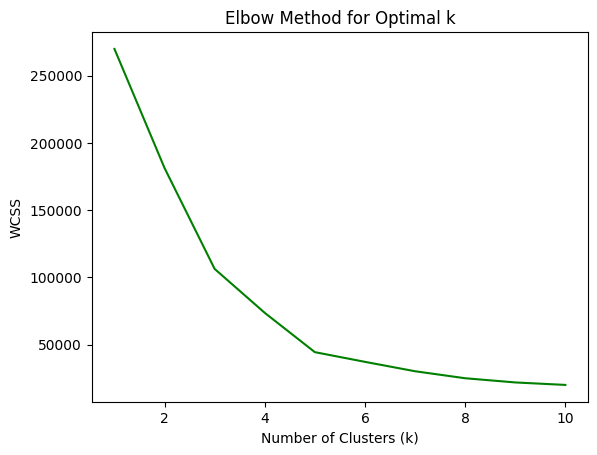

In [ ]:
from sklearn.cluster import KMeans
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++',random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
# Plot the elbow method
plt.plot(range(1, 11), WCSS,'g')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X) 
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


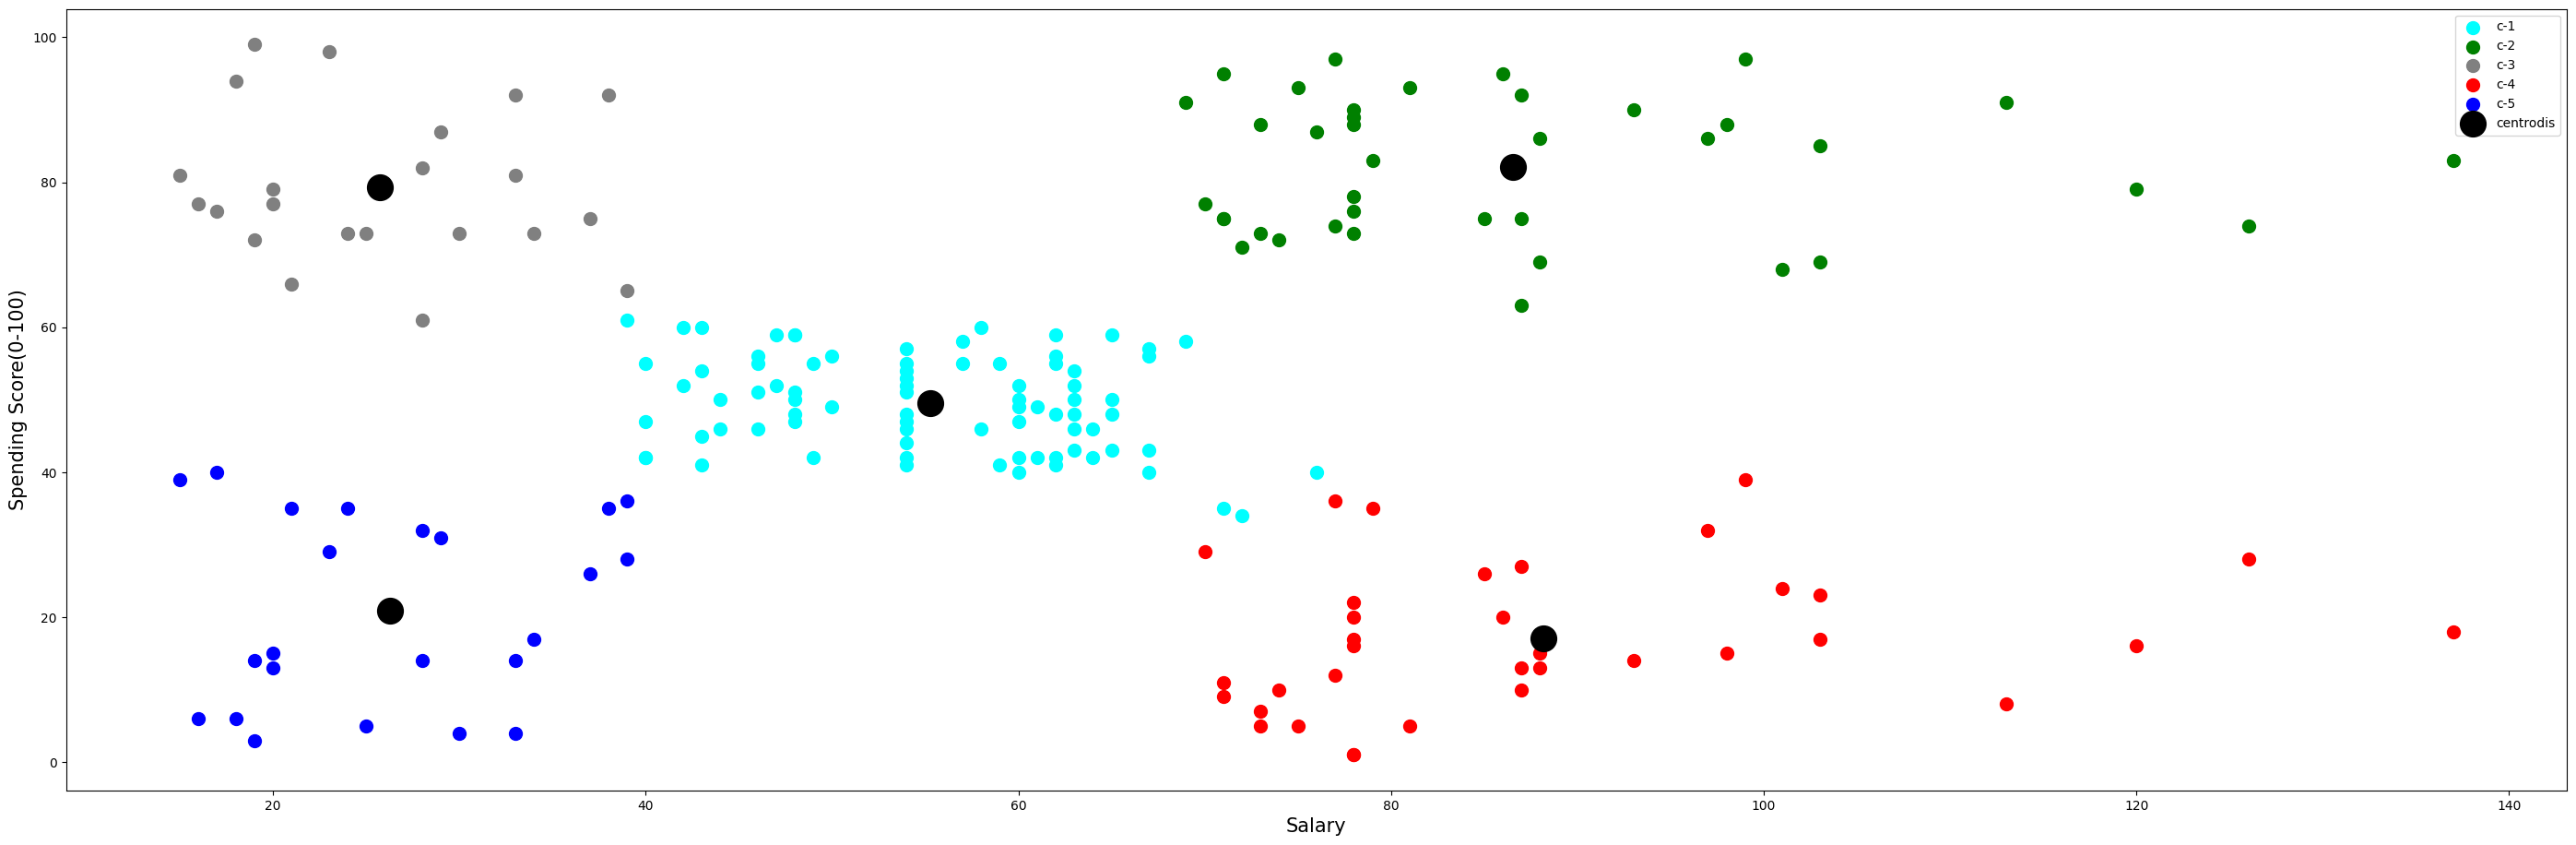

In [6]:
plt.figure(figsize=(35,11))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans ==0,1],s=100,color='cyan', label='c-1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans ==1,1],s=100,color='green', label='c-2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans ==2,1],s=100,color='grey', label='c-3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans ==3,1],s=100,color='red', label='c-4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans ==4,1],s=100,color='blue', label='c-5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,color='black',label='centrodis')
plt.legend()
plt.ylabel("Spending Score(0-100)",fontsize=15)
plt.xlabel("Salary",fontsize=15)
plt.show()

In [7]:
# Don't recommend product to people falling under c-2
# Recommend product to people falling under c-4
#c-1 is perfectly balanced